In [19]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import style
style.use("ggplot")
# from matplotlib import rcParams
# rcParams['figure.figsize'] = 10, 8

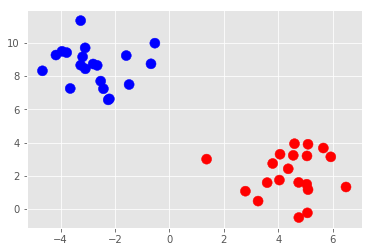

In [21]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=40, centers=2, random_state=42, cluster_std=1.25)
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap="bwr");
plt.show()

In [14]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

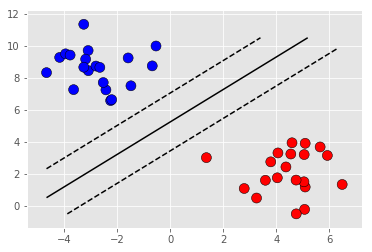

In [15]:
# WARNING! BOILERPLATE CODE HERE!
# Plot the decision boundaries
x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()

XX, YY = np.mgrid[x_min:x_max, y_min:y_max]
Z = model.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z = Z.reshape(XX.shape)
# plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
            linestyles=['--', '-', '--'], levels=[-.5, 0, .5])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k', s=100)
plt.show()

# Validation

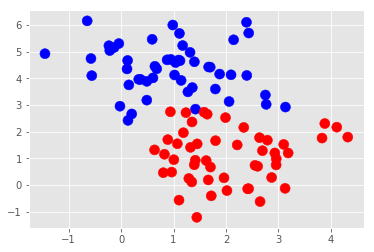

In [16]:
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=.95)
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap="bwr");
plt.show()

In [6]:
# Split data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [7]:
# Fit to the training data and validate with the test data
model = SVC(kernel='linear')
model.fit(X_train, y_train)
predictions = model.predict(X_test)

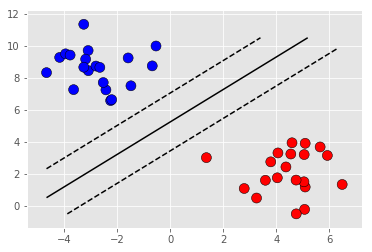

In [23]:
# Plot the decision boundaries
x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()

XX, YY = np.mgrid[x_min:x_max, y_min:y_max]
Z = model.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z = Z.reshape(XX.shape)
# plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
            linestyles=['--', '-', '--'], levels=[-.5, 0, .5])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k', s=100)
plt.show()

In [9]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["blue", "red"]))

             precision    recall  f1-score   support

       blue       0.83      1.00      0.91        10
        red       1.00      0.87      0.93        15

avg / total       0.93      0.92      0.92        25

